<a id="learning-objectives"></a>
### Learning Objectives
- Describe the basic `keras` workflow.
- Train regression and classification neural networks using `keras`

## Binary Classification

In [9]:
pip install tensorflow

     -------------------------------------- 895.9/895.9 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 7.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.1
    Uninstalling tensorboard-data-server-0.7.1:
      Successfully uninstalled tensorboard-data-server-0.7.1
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
Note: you may nee

  You can safely remove it manually.


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
## Load Dataset
data = load_breast_cancer()

In [5]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
## Setting up X and y
X = data.data
y = data.target

In [7]:
len(data.feature_names)

30

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
## Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify= y)

In [10]:
## Do standardization 

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [11]:
## Keras Model, we will use two classes from the Keras library to define our model.


# creates models layer-by-layer for most problems.
# It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs

from keras.models import Sequential # 2 models from keras 'Sequential Model and Model class'

# A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output 
# to the next layer.

from keras.layers import Dense

In [ ]:
# Build NN
#     - number of layers 
#     - number of neurals
#     - activation function 

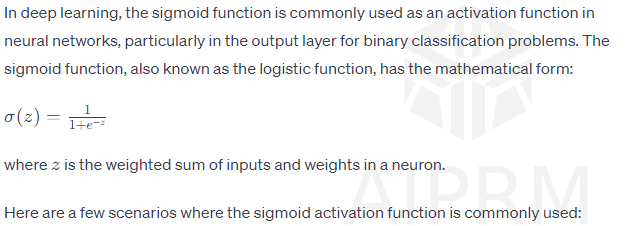

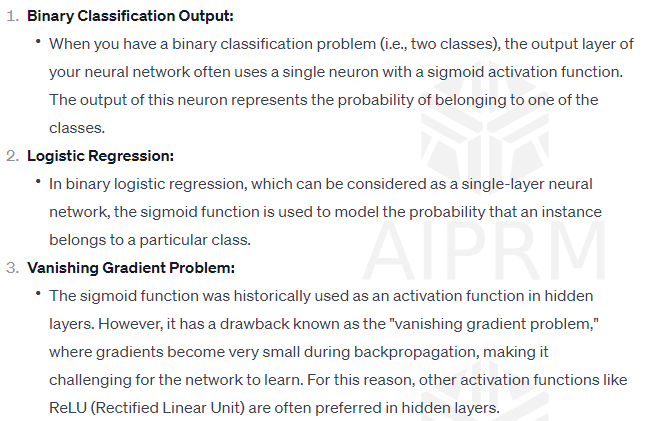

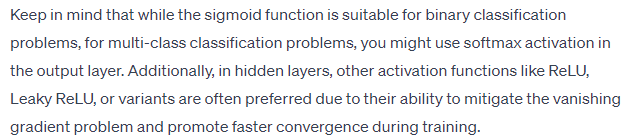

In [12]:
model = Sequential()
model.add(Dense(X_train.shape[1], activation='relu', input_dim=X_train.shape[1] ))
model.add(Dense(1, activation='sigmoid'))

model.add(...) adds a layer to the neural network model.

Dense(...) creates a fully connected layer, where each neuron is connected to all the neurons in the previous layer.

X_train.shape[1] is used as the first argument to specify the number of neurons in the layer. X_train refers to the training data, and X_train.shape[1] retrieves the number of features in the input data. **This ensures that the layer will have the same number of neurons as the number of features in the input data.**

activation='relu' sets the activation function for the layer to the Rectified Linear Unit (ReLU) activation function. **ReLU is commonly used in hidden layers to introduce non-linearity into the network.**

input_dim=X_train.shape[1] specifies the input dimension of the layer. It is set to the same value as the number of features in the input data. **This defines the shape of the input for the first layer in the network.**

Overall, this code adds a dense layer to the neural network model with the number of neurons equal to the number of features in the input data. It uses the ReLU activation function and specifies the input shape for the first layer.

In [13]:
model.summary()

# num_params = (input_size * num_neurons) + num_neurons

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Here, input_size refers to the number of inputs to the layer (e.g., the number of features in the input data), and num_neurons refers to the number of neurons in the layer. The first term (input_size * num_neurons) accounts for the weights connecting each input to each neuron, and the second term num_neurons accounts for the biases associated with each neuron.

The total number of parameters in the entire model is the sum of the parameters in each layer.

Knowing the number of parameters is useful because it indicates the model's capacity to learn and the complexity of the model. More parameters generally imply a higher capacity to learn complex patterns but may also increase the risk of overfitting if not properly regularized.

In [22]:
# Compile NN
#     - loss function
#     - optimizer

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
#3# Fit NN
#     - epoch
#     - batch size 

In [15]:
hist = model.fit(X_train,
          y_train,
         validation_data = (X_test, y_test),
         batch_size=None,
         epochs = 100)

Epoch 1/100


16/16 [==============================] - 2s 18ms/step - loss: 0.5507 - accuracy: 0.7480 - val_loss: 0.4239 - val_accuracy: 0.8596
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3615 - accuracy: 0.8965 - val_loss: 0.3070 - val_accuracy: 0.9298
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.2621 - accuracy: 0.9395 - val_loss: 0.2487 - val_accuracy: 0.9298
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.2096 - accuracy: 0.9512 - val_loss: 0.2171 - val_accuracy: 0.9474
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.1743 - accuracy: 0.9590 - val_loss: 0.1971 - val_accuracy: 0.9474
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1515 - accuracy: 0.9648 - val_loss: 0.1847 - val_accuracy: 0.9649
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.1346 - accuracy: 0.9688 - val_loss: 0.1767 - val_accuracy: 0.9649
Epoch 8/10

In [16]:
type(hist.history)

dict

In [17]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
hist.history['accuracy']

[0.748046875,
 0.896484375,
 0.939453125,
 0.951171875,
 0.958984375,
 0.96484375,
 0.96875,
 0.970703125,
 0.974609375,
 0.974609375,
 0.974609375,
 0.978515625,
 0.98046875,
 0.986328125,
 0.986328125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.990234375,
 0.990234375,
 0.9921875,
 0.9921875,
 0.9921875,
 0.9921875,
 0.9921875,
 0.9921875,
 0.9921875,
 0.9921875,
 0.9921875,
 0.9921875,
 0.9921875,
 0.9921875,
 0.9921875,
 0.994140625,
 0.994140625,
 0.994140625,
 0.994140625,
 0.994140625,
 0.994140625,
 0.994140625,
 0.994140625,
 0.994140625,
 0.9921875,
 0.994140625,
 0.994140625,
 0.9921875,
 0.9921875,
 0.994140625,
 0.994140625,
 0.994140625,
 0.994140625,
 0.994140625,
 0.9921875,
 0.9921875,
 0.994140625,
 0.9921875,
 0.9921875,
 0.9921875,
 0.994140625,
 0.9921875,
 0.9921875,
 0.994140625,
 0.994140625,
 0.9921875,
 0.9921875,
 0.994140625,
 0.9921875,
 0.994140625,
 0.99

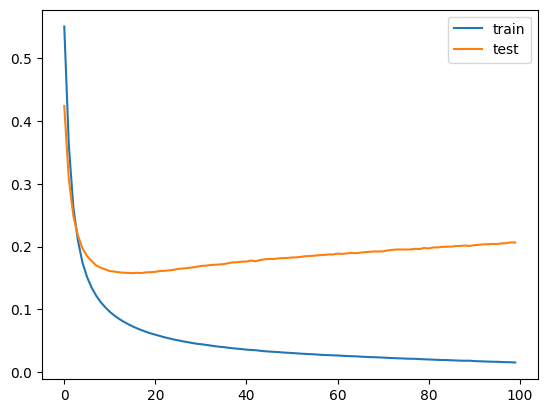

In [20]:
## plot loss function
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()

In [30]:
X_test[:2]

array([[-0.16542273, -0.33766446, -0.24926838, -0.24630776, -1.21793516,
        -1.22837315, -0.87340793, -0.95141095, -0.8881799 , -1.08819703,
        -0.52974412, -0.09517526, -0.58189478, -0.40008403, -1.10638011,
        -1.16846017, -0.71022945, -1.10454921, -0.86655065, -1.05902951,
        -0.16978307,  0.07346613, -0.25943378, -0.25823174, -1.22694065,
        -1.15456542, -0.81246356, -0.97631196, -0.92973429, -1.18789211],
       [-0.72048033, -0.25749339, -0.65151058, -0.70559183,  1.45936509,
         0.80470758,  0.13898373,  0.14695546,  0.50033082,  1.39076096,
         0.00565754,  0.93283282,  0.06605526, -0.28027344,  2.47499687,
         0.37072602,  0.57396567,  1.05868297, -0.30456749,  0.57055043,
        -0.61003998, -0.04096849, -0.57777412, -0.62510827,  1.97714125,
         0.19743736,  0.19950238,  0.39543477, -0.40452488,  0.47512487]])

In [31]:
## Make prediction
#model.predict_classes(X_test[:2])
model.predict(X_test[:2])

1/1 [==============================] - 0s 67ms/step


array([[0.9988758],
       [0.949304 ]], dtype=float32)

## Multi-Class Classification

In [32]:
from sklearn.datasets import load_iris
from keras.utils import to_categorical

In [33]:
## Load Dataset
data = load_iris()

In [34]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [35]:
## Setting up X and y
X = data.data
y = data.target

In [36]:
## Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify= y)

In [37]:
## Do standardization 
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [38]:
# process target - dummies
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [39]:
#y_train

In [40]:
#1# Build NN
#     - number of layers 
#     - number of neurals
#     - activation function 

In [41]:
X_train.shape[1]

4

In [42]:
len(set(y))

3

In [43]:
model = Sequential()
model.add(Dense(X_train.shape[1], activation='relu', input_dim=X_train.shape[1] ))
model.add(Dense(len(set(y)), activation='softmax'))

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [45]:
#2# Compile NN
#     - loss function
#     - optimizer

In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
#3# Fit NN
#     - epoch
#     - batch size 

In [48]:
hist = model.fit(X_train,
          y_train,
         validation_data = (X_test, y_test),
         batch_size=None,
         epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 28ms/step - loss: 1.3268 - accuracy: 0.4444 - val_loss: 1.3173 - val_accuracy: 0.4667
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 1.3090 - accuracy: 0.4444 - val_loss: 1.3003 - val_accuracy: 0.4667
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 1.2919 - accuracy: 0.4667 - val_loss: 1.2838 - val_accuracy: 0.4667
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 1.2753 - accuracy: 0.4519 - val_loss: 1.2667 - val_accuracy: 0.4667
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 1.2577 - accuracy: 0.4667 - val_loss: 1.2502 - val_accuracy: 0.4667
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 1.2417 - accuracy: 0.4667 - val_loss: 1.2335 - val_accuracy: 0.4667
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 1.2255 - accuracy: 0.4741 - val_loss: 1.2176 - val_accuracy: 0.4667
Epoch 8/100
5/5 [=========

5/5 [==============================] - 0s 7ms/step - loss: 0.6948 - accuracy: 0.7481 - val_loss: 0.6542 - val_accuracy: 0.8000
Epoch 60/100
5/5 [==============================] - 0s 7ms/step - loss: 0.6883 - accuracy: 0.7556 - val_loss: 0.6461 - val_accuracy: 0.8000
Epoch 61/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6819 - accuracy: 0.7481 - val_loss: 0.6382 - val_accuracy: 0.8000
Epoch 62/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6755 - accuracy: 0.7481 - val_loss: 0.6305 - val_accuracy: 0.8000
Epoch 63/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6695 - accuracy: 0.7481 - val_loss: 0.6231 - val_accuracy: 0.8000
Epoch 64/100
5/5 [==============================] - 0s 7ms/step - loss: 0.6636 - accuracy: 0.7481 - val_loss: 0.6167 - val_accuracy: 0.8000
Epoch 65/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6585 - accuracy: 0.7481 - val_loss: 0.6104 - val_accuracy: 0.8000
Epoch 66/100
5/5 [===============

In [49]:
type(hist.history)

dict

In [50]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [51]:
#hist.history['acc']

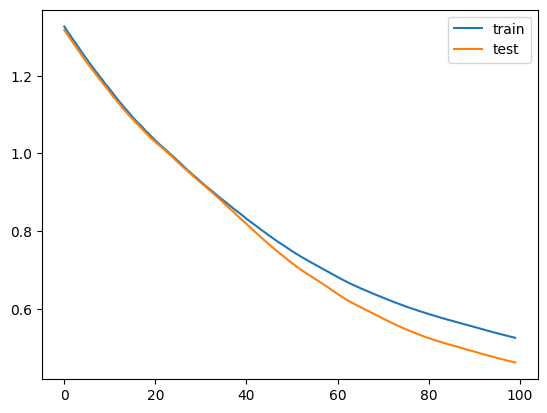

In [52]:
## plot loss function
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()

In [53]:
X_test[:2]

array([[-0.42207409, -1.34078434,  0.1381817 ,  0.12427091],
       [ 0.67839806, -0.62534605,  1.05374141,  1.17280669]])

In [54]:
## Make prediction
model.predict(X_test[:2])

1/1 [==============================] - 0s 32ms/step


array([[0.07539634, 0.720947  , 0.20365664],
       [0.05550127, 0.32873347, 0.6157652 ]], dtype=float32)

In [55]:
model.predict(X_test[:3])

1/1 [==============================] - 0s 15ms/step


array([[0.07539634, 0.720947  , 0.20365664],
       [0.05550127, 0.32873347, 0.6157652 ],
       [0.9068038 , 0.08850377, 0.0046924 ]], dtype=float32)

## Regression

In [56]:
from sklearn.datasets import load_diabetes
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [57]:
## Load Dataset
data = load_diabetes()

In [58]:
## Setting up X and y
X = data.data
y = data.target

In [59]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [60]:
#y

In [61]:
## Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
## Do standardization 
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [63]:
# process target


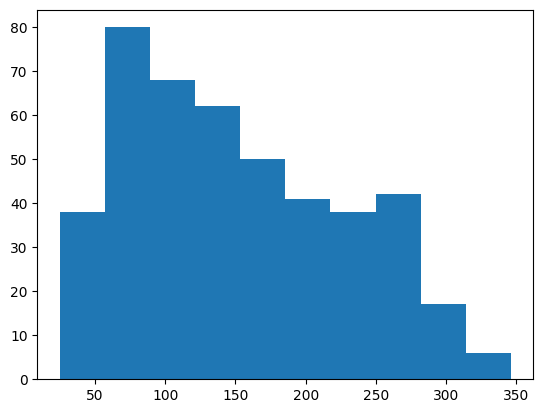

In [64]:
#hist for target
plt.hist(y);

In [65]:
#1# Build NN
#     - number of layers 
#     - number of neurals
#     - activation function 

In [66]:
model = Sequential()
model.add(Dense(X_train.shape[1], activation='relu', input_dim=X_train.shape[1] ))
model.add(Dense(1))

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [68]:
#2# Compile NN
#     - loss function
#     - optimizer

In [69]:
opt = Adam(lr=.1)

C:\Users\aicyb\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [70]:
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

In [71]:
#3# Fit NN
#     - epoch
#     - batch size 

In [72]:
hist = model.fit(X_train,
          y_train,
         validation_data = (X_test, y_test),
         batch_size=None,
         epochs = 100)

Epoch 1/100
12/12 [==============================] - 0s 10ms/step - loss: 26601.9199 - accuracy: 0.0000e+00 - val_loss: 23650.5117 - val_accuracy: 0.0000e+00
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 16409.9922 - accuracy: 0.0000e+00 - val_loss: 10488.4385 - val_accuracy: 0.0000e+00
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 6473.6367 - accuracy: 0.0000e+00 - val_loss: 5786.8921 - val_accuracy: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 5072.4229 - accuracy: 0.0000e+00 - val_loss: 5112.4604 - val_accuracy: 0.0000e+00
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 3847.2600 - accuracy: 0.0000e+00 - val_loss: 5380.1821 - val_accuracy: 0.0000e+00
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 3630.1721 - accuracy: 0.0000e+00 - val_loss: 4919.2632 - val_accuracy: 0.0000e+00
Epoch 7/100
12/12 [==============================] - 0s 3ms/step 

12/12 [==============================] - 0s 3ms/step - loss: 2410.1331 - accuracy: 0.0000e+00 - val_loss: 3603.6965 - val_accuracy: 0.0000e+00
Epoch 54/100
12/12 [==============================] - 0s 3ms/step - loss: 2551.6460 - accuracy: 0.0000e+00 - val_loss: 3533.6299 - val_accuracy: 0.0000e+00
Epoch 55/100
12/12 [==============================] - 0s 3ms/step - loss: 2436.9858 - accuracy: 0.0000e+00 - val_loss: 3515.8235 - val_accuracy: 0.0000e+00
Epoch 56/100
12/12 [==============================] - 0s 3ms/step - loss: 2560.3608 - accuracy: 0.0000e+00 - val_loss: 3512.1709 - val_accuracy: 0.0000e+00
Epoch 57/100
12/12 [==============================] - 0s 3ms/step - loss: 2517.4612 - accuracy: 0.0000e+00 - val_loss: 3523.1699 - val_accuracy: 0.0000e+00
Epoch 58/100
12/12 [==============================] - 0s 3ms/step - loss: 2549.8977 - accuracy: 0.0000e+00 - val_loss: 3612.5710 - val_accuracy: 0.0000e+00
Epoch 59/100
12/12 [==============================] - 0s 3ms/step - loss: 238

In [73]:
type(hist.history)

dict

In [74]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [75]:
#hist.history['acc']

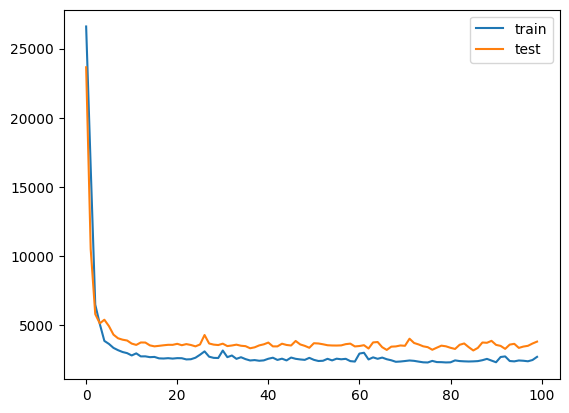

In [76]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()

In [77]:
X_test[:2]

array([[-0.87794839,  1.08582335,  0.28360251, -0.11767561, -0.26293933,
         0.11859803, -1.5214917 ,  1.49521868,  0.73285465, -0.2743704 ],
       [ 0.01862571, -0.92096012, -0.96975191, -0.68964793, -1.48935785,
        -1.69500589,  0.94911425, -1.4654345 , -1.27806725, -1.70789861]])

In [78]:
## Make prediction
model.predict(X_test[:2])
# model.predict_proba(X_test[:2])

1/1 [==============================] - 0s 36ms/step


array([[167.6091 ],
       [ 85.72689]], dtype=float32)